
> Preprocessing Data















In [ ]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import Dataset
data_buku = pd.read_csv("/content/drive/MyDrive/books_rec/books_topselling.csv")
data_buku.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
data_buku.shape

(550, 7)

In [ ]:
data_buku.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
data_buku.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [ ]:
data_buku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
data_buku.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
norm_rating    0
norm_review    0
skor           0
dtype: int64

In [ ]:
#Sorting berdasarkan kolom rating
rating_sorted = data_buku.sort_values(by="User Rating", ascending=False)
rating_sorted.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction


In [ ]:
#Sorting berdasarkan kolom reviewers
view_sorted = data_buku.sort_values(by="Reviews", ascending=False)
view_sorted.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction


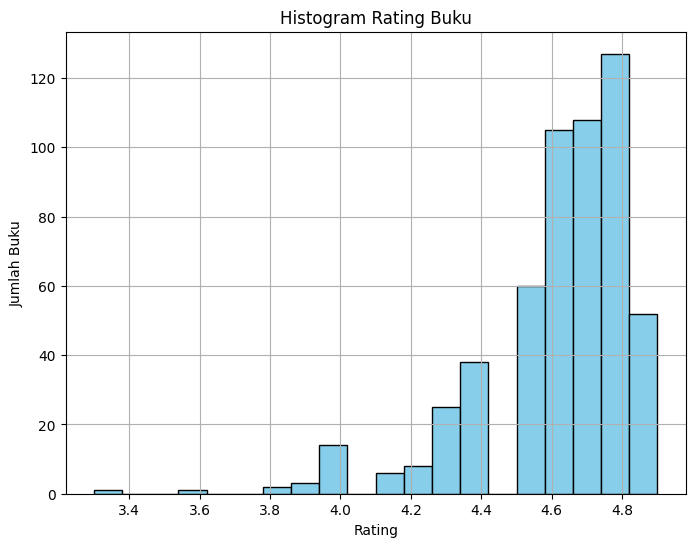

In [ ]:
#Melakukan visualisasi Histogram Rating Buku
plt.figure(figsize=(8, 6))
data_buku['User Rating'].hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Jumlah Buku')
plt.title('Histogram Rating Buku')
plt.show()

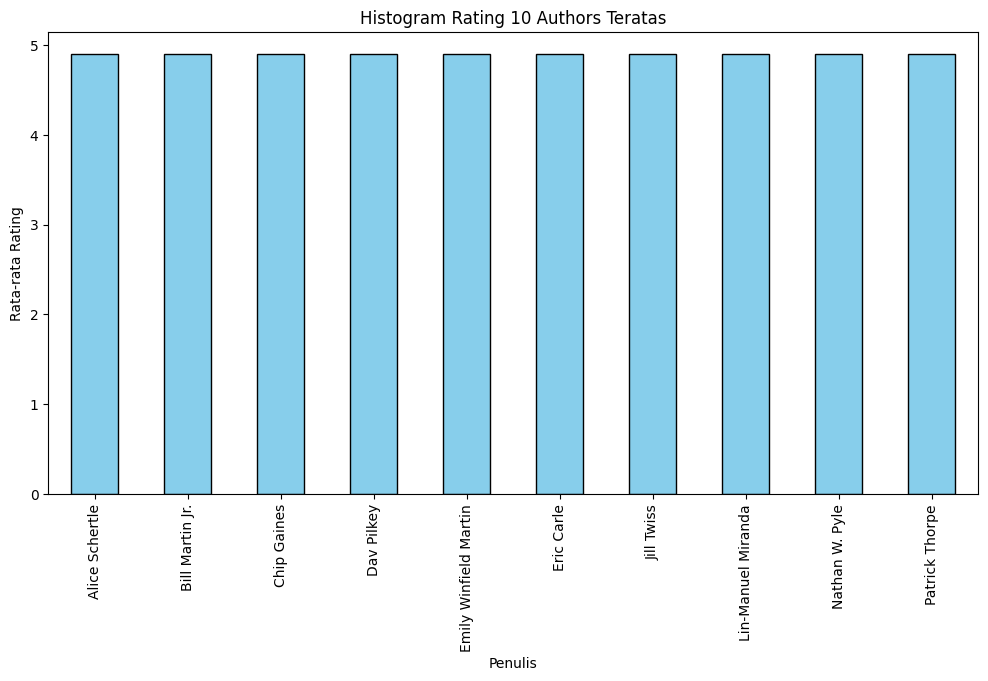

In [ ]:
plt.figure(figsize=(12, 6))
authors = data_buku.groupby('Author')['User Rating'].mean().nlargest(10)
authors.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Penulis')
plt.ylabel('Rata-rata Rating')
plt.title('Histogram Rating 10 Authors Teratas')
plt.xticks(rotation=90)
plt.show()

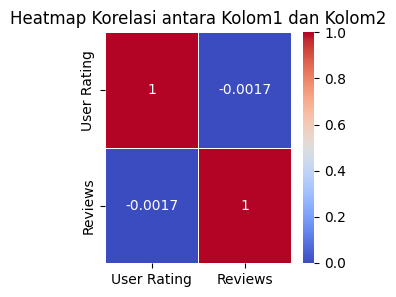

In [ ]:
#Melihat Hubungan korelasi antara kolom rating dan reviews
korelasi = data_buku[['User Rating', 'Reviews']].corr()
plt.figure(figsize=(3, 3))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi antara Kolom1 dan Kolom2')
plt.show()

Berdasarkan Korelasi diatas didapatkan bahwa tidak ada hubungan antara rating dan review dimana, tidak semua buku yang memiliki rating tinggi memiliki riview yang tinggi

> Membangun Sistem item Collaborative Filtering

Pada sistem item collaborative filtering ini menggunakan metode weighted sum untuk menampilkan data yang memiliki rating dan review tertinggi

In [ ]:
#Melakukan Normalisasi User Rating Reviews
data_buku['norm_rating'] = (data_buku['User Rating'] - data_buku['User Rating'].min()) / (data_buku['User Rating'].max() - data_buku['User Rating'].min())
data_buku['norm_review'] = (data_buku['Reviews'] - data_buku['Reviews'].min()) / (data_buku['Reviews'].max() - data_buku['Reviews'].min())
# Hitung skor weighted sum
data_buku['skor'] = 0.5 * data_buku['norm_rating'] + 0.5 * data_buku['norm_review']

In [ ]:
# Rekomendasi buku dengan peringkat tertinggi
rekomendasi_buku = data_buku.sort_values(by='skor', ascending=False)
print("Buku yang direkomendasikan:")
print(rekomendasi_buku[['Name', 'skor']])

Buku yang direkomendasikan:
                             Name      skor
534       Where the Crawdads Sing  0.968750
32                       Becoming  0.816661
33                       Becoming  0.816661
437      The Nightingale: A Novel  0.749210
438      The Nightingale: A Novel  0.749210
..                            ...       ...
306           StrengthsFinder 2.0  0.247405
364  The Elegance of the Hedgehog  0.229125
22                      Allegiant  0.223222
132    Go Set a Watchman: A Novel  0.178854
353            The Casual Vacancy  0.053158

[550 rows x 2 columns]


In [ ]:
# Rekomendasi buku dengan peringkat tertinggi (list)
rekomendasi_buku_list = data_buku.sort_values(by='skor', ascending=False)['Name'].tolist()
print("Buku yang direkomendasikan:", rekomendasi_buku_list)

Buku yang direkomendasikan: ['Where the Crawdads Sing', 'Becoming', 'Becoming', 'The Nightingale: A Novel', 'The Nightingale: A Novel', 'The Fault in Our Stars', 'The Fault in Our Stars', 'The Fault in Our Stars', 'The Fault in Our Stars', 'The Girl on the Train', 'The Girl on the Train', 'The Martian', 'The Alchemist', 'The Wonky Donkey', 'The Wonky Donkey', 'Unbroken: A World War II Story of Survival, Resilience, and Redemption', 'Unbroken: A World War II Story of Survival, Resilience, and Redemption', 'Unbroken: A World War II Story of Survival, Resilience, and Redemption', 'Unbroken: A World War II Story of Survival, Resilience, and Redemption', 'Unbroken: A World War II Story of Survival, Resilience, and Redemption', "Oh, the Places You'll Go!", "Oh, the Places You'll Go!", "Oh, the Places You'll Go!", "Oh, the Places You'll Go!", "Oh, the Places You'll Go!", "Oh, the Places You'll Go!", "Oh, the Places You'll Go!", "Oh, the Places You'll Go!", 'The Hunger Games (Book 1)', 'The Hu

In [ ]:
# Menyimpan DataFrame ke dalam file CSV
rekomendasi_buku.to_csv('data_collaborative.csv', index=False)

> Membangun Sistem Content Based Filtering

In [ ]:
# mengambil data yang diperlukan
rekomendasi_buku.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,norm_rating,norm_review,skor
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction,0.9375,1.000000,0.968750
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction,0.9375,0.695823,0.816661
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction,0.9375,0.695823,0.816661
437,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2015,Fiction,0.9375,0.560920,0.749210
438,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2016,Fiction,0.9375,0.560920,0.749210


In [ ]:
#mengambil kolom "Name", "Authors", dan "Genre"
filter_buku = rekomendasi_buku[['Name', 'Author', 'Genre']]
filter_buku.head()

,Name,Author,Genre
534,Where the Crawdads Sing,Delia Owens,Fiction
32,Becoming,Michelle Obama,Non Fiction
33,Becoming,Michelle Obama,Non Fiction
437,The Nightingale: A Novel,Kristin Hannah,Fiction
438,The Nightingale: A Novel,Kristin Hannah,Fiction


In [ ]:
genre_mapping = {
    'Fiction': 'Fiksi',
    'Non Fiction': 'Non Fiksi'
}

# Membersihkan nilai kolom "Genre" dari spasi ekstra
filter_buku['Genre'] = filter_buku['Genre'].str.strip()
filter_buku['Genre'] = filter_buku['Genre'].map(genre_mapping)
filter_buku.head()

<ipython-input-24-5f6efb63dd53>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_buku['Genre'] = filter_buku['Genre'].str.strip()
<ipython-input-24-5f6efb63dd53>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_buku['Genre'] = filter_buku['Genre'].map(genre_mapping)


,Name,Author,Genre
534,Where the Crawdads Sing,Delia Owens,Fiksi
32,Becoming,Michelle Obama,Non Fiksi
33,Becoming,Michelle Obama,Non Fiksi
437,The Nightingale: A Novel,Kristin Hannah,Fiksi
438,The Nightingale: A Novel,Kristin Hannah,Fiksi


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Gabungkan kolom Title, Author, dan Genre menjadi satu dokumen
filter_buku['Combined'] = filter_buku['Name'] + ' ' + filter_buku['Author'] + ' ' + filter_buku['Genre']
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(filter_buku['Combined'])


#Rekomendasi Berdasarkan Prefrensi USer
book_title = 'The Nightingale: A Novel'
authors = 'Kristin Hannah'
genre = 'Non Fiksi'

combined_features = book_title + ' ' + authors + ' ' + genre
tfidf_vector = tfidf_vectorizer.transform([combined_features])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_vector)
sorted_cosine_sim = np.argsort(cosine_sim, axis=0)[::-1]
rekomendasi_content = np.argsort(cosine_sim, axis=0)[::-1][:15]
rekomendasi_content = [filter_buku['Name'].iloc[i] for i in rekomendasi_content]
rekomendasi_content

<ipython-input-72-5cd1b5d0d83d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_buku['Combined'] = filter_buku['Name'] + ' ' + filter_buku['Author'] + ' ' + filter_buku['Genre']


[438    The Nightingale: A Novel
 Name: Name, dtype: object,
 437    The Nightingale: A Novel
 Name: Name, dtype: object,
 357    The Confession: A Novel
 Name: Name, dtype: object,
 397    The Guardians: A Novel
 Name: Name, dtype: object,
 520    Under the Dome: A Novel
 Name: Name, dtype: object,
 340    The Art of Racing in the Rain: A Novel
 Name: Name, dtype: object,
 341    The Art of Racing in the Rain: A Novel
 Name: Name, dtype: object,
 445    The Paris Wife: A Novel
 Name: Name, dtype: object,
 79    Doctor Sleep: A Novel
 Name: Name, dtype: object,
 454    The President Is Missing: A Novel
 Name: Name, dtype: object,
 218    Little Bee: A Novel
 Name: Name, dtype: object,
 132    Go Set a Watchman: A Novel
 Name: Name, dtype: object,
 286    Ready Player One: A Novel
 Name: Name, dtype: object,
 287    Ready Player One: A Novel
 Name: Name, dtype: object,
 1    11/22/63: A Novel
 Name: Name, dtype: object]